# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART A: CLASSIFICATION

Background
==========
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.


One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Exploratory Data Analysis
======================
A first view of the dataset to understand the data structure and data value.

### Overview of Imported Data

In [498]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![](image\data_description.png)

### List DataFrame Info

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### List DataFrame Description

In [500]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Count number of missing value in each column

In [501]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [502]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(df, hue="Survived", height=2)
plt.show()

In [503]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values) 
plt.show()

Data Preparation
==============

### Feature Selection
To remove features that doesn't bring impact or less important to the classification

In [504]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], 1)
df.shape

(891, 9)

### SibSp & Parch
To normalise the number of sibling/spouse/parents/children aboard the Titanic into single column **hasFamilyAboard** with the value "Yes" or "No"

In [505]:
df['hasFamilyAboard'] = np.where((df['SibSp'] > 0) & (df['Parch'] > 0), 'Yes', 'No')
df = df.drop(['SibSp', 'Parch'], 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age     Fare Cabin Embarked hasFamilyAboard
0         0       3    male  22.0   7.2500   NaN        S              No
1         1       1  female  38.0  71.2833   C85        C              No
2         1       3  female  26.0   7.9250   NaN        S              No
3         1       1  female  35.0  53.1000  C123        S              No
4         0       3    male  35.0   8.0500   NaN        S              No


(891, 8)

### Fare
To group Fare into multiple folds

In [506]:
fare_bins=[0,10,20,40,60,80,100,200,600]
fare_labels=[1,2,3,4,5,6,7,8]
df['Fare_Group'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df = df.drop('Fare', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age Cabin Embarked hasFamilyAboard Fare_Group
0         0       3    male  22.0   NaN        S              No          1
1         1       1  female  38.0   C85        C              No          5
2         1       3  female  26.0   NaN        S              No          1
3         1       1  female  35.0  C123        S              No          4
4         0       3    male  35.0   NaN        S              No          1


(891, 8)

### Cabin
There are many missing data in this column. Transform into "Yes" (with records) and "No" (without record) 

In [507]:
df['Cabin'].fillna('No', inplace=True)
df['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
print(df.head())
df.shape

   Survived  Pclass     Sex   Age Cabin Embarked hasFamilyAboard Fare_Group
0         0       3    male  22.0    No        S              No          1
1         1       1  female  38.0   Yes        C              No          5
2         1       3  female  26.0    No        S              No          1
3         1       1  female  35.0   Yes        S              No          4
4         0       3    male  35.0    No        S              No          1


(891, 8)

### Age
* To replace missing value (NaN) with mean value of Age
* To normalise Age into 3 categories
    * Children (0-12)
    * Adult (13-59)
    * Elderly (60 and above)

In [508]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
age_bins=[0,13,60,120]
age_labels=['Children','Adult','Elderly']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
df = df.drop('Age', 1)
print(df.head())
df.shape

   Survived  Pclass     Sex Cabin Embarked hasFamilyAboard Fare_Group  \
0         0       3    male    No        S              No          1   
1         1       1  female   Yes        C              No          5   
2         1       3  female    No        S              No          1   
3         1       1  female   Yes        S              No          4   
4         0       3    male    No        S              No          1   

  Age_Group  
0     Adult  
1     Adult  
2     Adult  
3     Adult  
4     Adult  


(891, 8)

### Embarked
To replace missing value (NaN) with mode value of Embarked.

In [509]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df.head())
df.shape

   Survived  Pclass     Sex Cabin Embarked hasFamilyAboard Fare_Group  \
0         0       3    male    No        S              No          1   
1         1       1  female   Yes        C              No          5   
2         1       3  female    No        S              No          1   
3         1       1  female   Yes        S              No          4   
4         0       3    male    No        S              No          1   

  Age_Group  
0     Adult  
1     Adult  
2     Adult  
3     Adult  
4     Adult  


(891, 8)

### Encoding
Encode all categorical columns

In [510]:
df = pd.get_dummies(df)
print(df.head())
df.shape

   Survived  Pclass  Sex_female  Sex_male  Cabin_No  Cabin_Yes  Embarked_C  \
0         0       3           0         1         1          0           0   
1         1       1           1         0         0          1           1   
2         1       3           1         0         1          0           0   
3         1       1           1         0         0          1           0   
4         0       3           0         1         1          0           0   

   Embarked_Q  Embarked_S  hasFamilyAboard_No  ...  Fare_Group_2  \
0           0           1                   1  ...             0   
1           0           0                   1  ...             0   
2           0           1                   1  ...             0   
3           0           1                   1  ...             0   
4           0           1                   1  ...             0   

   Fare_Group_3  Fare_Group_4  Fare_Group_5  Fare_Group_6  Fare_Group_7  \
0             0             0             0    

(891, 22)

### Sort the most important features relative to Price

In [511]:
corr = df.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr["Survived"])

Survived               1.000000
Sex_female             0.543351
Cabin_Yes              0.316912
Embarked_C             0.168240
Fare_Group_6           0.162583
Fare_Group_7           0.150716
Age_Group_Children     0.116691
Fare_Group_4           0.099358
Fare_Group_8           0.098513
Fare_Group_5           0.055730
Fare_Group_3           0.051066
hasFamilyAboard_Yes    0.047257
Fare_Group_2           0.042006
Embarked_Q             0.003650
Age_Group_Elderly     -0.040857
hasFamilyAboard_No    -0.047257
Age_Group_Adult       -0.078779
Embarked_S            -0.149683
Fare_Group_1          -0.295081
Cabin_No              -0.316912
Pclass                -0.338481
Sex_male              -0.543351
Name: Survived, dtype: float64


Train Model (Single Model)
======================

### Select Model
Linear SVC is selected as training model following the cheat-sheet in our use case

![](image\sklearn_cheatsheet.png)

### Train Test Split
Split training and test data into (80/20) and fix random state to 42

In [512]:
from sklearn.model_selection import train_test_split

df.info()
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Survived             891 non-null    int64
 1   Pclass               891 non-null    int64
 2   Sex_female           891 non-null    uint8
 3   Sex_male             891 non-null    uint8
 4   Cabin_No             891 non-null    uint8
 5   Cabin_Yes            891 non-null    uint8
 6   Embarked_C           891 non-null    uint8
 7   Embarked_Q           891 non-null    uint8
 8   Embarked_S           891 non-null    uint8
 9   hasFamilyAboard_No   891 non-null    uint8
 10  hasFamilyAboard_Yes  891 non-null    uint8
 11  Fare_Group_1         891 non-null    uint8
 12  Fare_Group_2         891 non-null    uint8
 13  Fare_Group_3         891 non-null    uint8
 14  Fare_Group_4         891 non-null    uint8
 15  Fare_Group_5         891 non-null    uint8
 16  Fare_Group_6         891 n

### Train Model (LinearSVC)

In [513]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

### Score Model

In [514]:
training_data_score = model.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_data_score*100))

test_data_score = model.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_data_score*100))

Training Data Score: 80.76%
Test Data Score: 79.89%


Evaluate Model (Single Model)
=========================

### 1. confusion_matrix

In [515]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[90 15]
 [21 53]]


### 2. plot_confusion_matrix

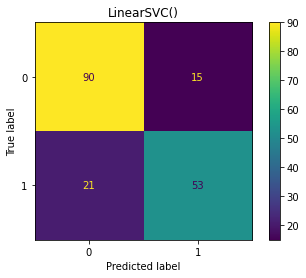

In [516]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.title(model)
plt.show()

### 3. classification_report

In [517]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Model Improvement (Single Model)
=============================

### 1. Hyperparameter Tuning
To use GridSearchCV which includes Cross Validation to identify best paramter and best score.

In [518]:
from sklearn.model_selection import GridSearchCV

svm = LinearSVC()
param_grid = {'C': [0.01,0.1,1.0,10.0,100.0]}
grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.801, test=0.804), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.794, test=0.797), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.798, test=0.754), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.811, test=0.761), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.795, test=0.831), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.803, test=0.811), total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ........... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV] .......... C=10.0, score=(train=0.803, test=0.811), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.791, test=0.811), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.805, test=0.775), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.819, test=0.732), total=   0.0s
[CV] C=10.0 ..........................................................
[CV] .......... C=10.0, score=(train=0.791, test=0.796), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.814, test=0.804), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.807, test=0.818), total=   0.0s
[CV] C=100.0 .........................................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

[CV] ......... C=100.0, score=(train=0.804, test=0.789), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.818, test=0.732), total=   0.0s
[CV] C=100.0 .........................................................
[CV] ......... C=100.0, score=(train=0.802, test=0.817), total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [519]:
print("Best Param: {}".format(grid_search.best_params_))
print("Best Score: {:.2f}%".format(grid_search.best_score_*100))

Best Param: {'C': 100.0}
Best Score: 79.21%


### 2. Bias-variance trade-off
To identify Appropriate-fitting

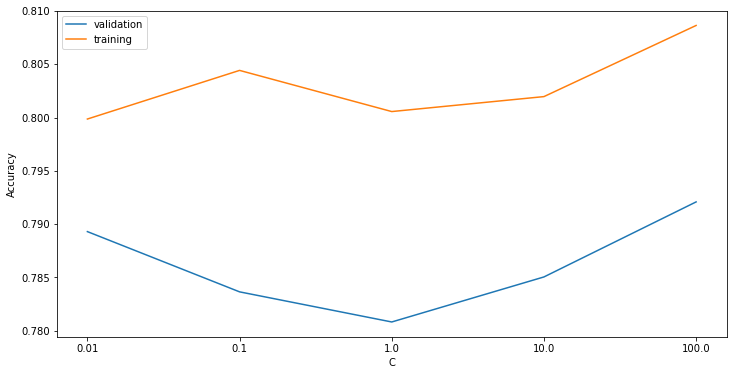

In [520]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(5), param_grid['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');

Train Model (Multiple Models)
=========================
To train multiple models and compare the scores

### Assign multiple models & their corresponding param_grid into Dictionary Array

In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Dict = [
    {'model': LogisticRegression(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}},
    {'model': KNeighborsClassifier(),
     'param_grid': {'n_neighbors': [1,2,3,4,5,6,7,8,9]}},
    {'model': GaussianNB(),
     'param_grid': {'var_smoothing': np.logspace(0,-9, num=100)}},
    {'model': DecisionTreeClassifier(),
     'param_grid': {'criterion': ['gini', 'entropy']}},
    {'model': SVC(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0]}},
    {'model': LinearSVC(),
     'param_grid': {'C': [0.01,0.1,1.0,10.0,100.0], 'penalty': ['l1', 'l2']}}
]

### Loop Dictionary and compile all scores into table

In [522]:
rows = []
for i in Dict:
    # Fit Training Data to model selected
    model = i['model']
    model.fit(X_train, y_train)
    
    # Predict Train Data
    y_predict_train_data = model.predict(X_train)
    x_train_accuracy_score = accuracy_score(y_train, y_predict_train_data)
    x_train_auc_score = roc_auc_score(y_train, y_predict_train_data)

    # Predict Test Data
    y_predict_test_data = model.predict(X_test)
    x_test_accuracy_score = accuracy_score(y_test, y_predict_test_data)
    x_test_auc_score = roc_auc_score(y_test, y_predict_test_data)

    # Calculate Confusion_Matrix
    cm = confusion_matrix(y_test, y_predict_test_data)

    # Perform Hyperparameter Tuning & Cross Validation
    grid_search = GridSearchCV(model, param_grid=i['param_grid'], cv=5, verbose=3, return_train_score=True)
    grid_search.fit(X_train, y_train)

    rows.append([model, 
                 "{:.2f}%".format(x_train_accuracy_score*100), 
                 "{:.2f}%".format(x_test_accuracy_score*100), 
                 "{:.2f}".format(x_train_auc_score), 
                 "{:.2f}".format(x_test_auc_score), 
                 cm,
                 grid_search.best_params_,
                 "{:.2f}%".format(grid_search.best_score_*100)])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] .. C=0.01, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01, penalty=l2, score=(train=0.782, test=0.762), total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV]  C=0.01,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 


[CV] C=0.01, penalty=none ............................................
[CV]  C=0.01, penalty=none, score=(train=0.793, test=0.796), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ... C=0.1, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.819, test=0.797), total=   0.0s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2


[CV] C=0.1, penalty=none .............................................
[CV]  C=0.1, penalty=none, score=(train=0.814, test=0.732), total=   0.0s
[CV] C=0.1, penalty=none .............................................
[CV]  C=0.1, penalty=none, score=(train=0.793, test=0.796), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\s


[CV] C=1.0, penalty=l2 ...............................................
[CV]  C=1.0, penalty=l2, score=(train=0.784, test=0.796), total=   0.0s
[CV] C=1.0, penalty=elasticnet .......................................
[CV]  C=1.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=elasticnet .......................................
[CV]  C=1.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=elasticnet .......................................
[CV]  C=1.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=elasticnet .......................................
[CV]  C=1.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=elasticnet .......................................
[CV]  C=1.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=none .............................................
[CV]  C=1.0, penalty=none, score=(train=0.801, tes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_sele


[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .. C=10.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.801, test=0.790), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.793, test=0.811), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.814, test=0.789), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.812, test=0.732), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.788, test=0.796), total=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod

[CV]  C=100.0, penalty=l2, score=(train=0.789, test=0.804), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.814, test=0.789), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.814, test=0.732), total=   0.0s
[CV] C=100.0, penalty=l2 .............................................
[CV]  C=100.0, penalty=l2, score=(train=0.793, test=0.796), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet .....................................
[CV]  C=100.0, penalty=elasticnet, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=elasticnet ...........

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_mod


[CV] C=100.0, penalty=none ...........................................
[CV]  C=100.0, penalty=none, score=(train=0.793, test=0.796), total=   0.0s
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.863, test=0.769), total=   0.0s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... n_neighbors=1, score=(train=0.830, test=0.818), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.688, test=0.634), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.854, test=0.768), total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.816, test=0.754), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.833, test=0.776), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.812, test=0.811), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.839, test=0.803), total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  var_smoothing=0.43287612810830584, score=(train=0.756, test=0.734), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.740, test=0.783), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.749, test=0.761), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.781, test=0.739), total=   0.0s
[CV] var_smoothing=0.43287612810830584 ...............................
[CV]  var_smoothing=0.43287612810830584, score=(train=0.744, test=0.704), total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV]  var_smoothing=0.3511191734215131, score=(train=0.750, test=0.699), total=   0.0s
[CV] var_smoothing=0.3511191734215131 ................................
[CV]  var_smoothing=0.3511191734215131, score=(

[CV]  var_smoothing=0.02310129700083159, score=(train=0.749, test=0.755), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.768, test=0.776), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.774, test=0.739), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.758, test=0.746), total=   0.0s
[CV] var_smoothing=0.02310129700083159 ...............................
[CV]  var_smoothing=0.02310129700083159, score=(train=0.768, test=0.725), total=   0.0s
[CV] var_smoothing=0.01873817422860384 ...............................
[CV]  var_smoothing=0.01873817422860384, score=(train=0.749, test=0.755), total=   0.0s
[CV] var_smoothing=0.01873817422860384 ...............................
[CV]  var_smoothing=0.01873817422860384, score

[CV]  var_smoothing=0.0015199110829529332, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=0.0015199110829529332 .............................
[CV]  var_smoothing=0.0015199110829529332, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.0012328467394420659, score=(train=0.742, test=0.720), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.0012328467394420659, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.0012328467394420659, score=(train=0.733, test=0.683), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.0012328467394420659, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=0.0012328467394420659 .............................
[CV]  var_smoothing=0.001232846739

[CV]  var_smoothing=8.111308307896872e-05, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=8.111308307896872e-05 .............................
[CV]  var_smoothing=8.111308307896872e-05, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=6.579332246575683e-05 .............................
[CV]  var_smoothing=6.579332246575683e-05, score=(train=0.743, test=0.720), total=   0.0s
[CV] var_smoothing=6.579332246575683e-05 .............................
[CV]  var_smoothing=6.579332246575683e-05, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=6.579332246575683e-05 .............................
[CV]  var_smoothing=6.579332246575683e-05, score=(train=0.733, test=0.683), total=   0.0s
[CV] var_smoothing=6.579332246575683e-05 .............................
[CV]  var_smoothing=6.579332246575683e-05, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=6.579332246575683e-05 .............................
[CV]  var_smoothing=6.579332246575

[CV]  var_smoothing=4.328761281083053e-06, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=4.328761281083053e-06 .............................
[CV]  var_smoothing=4.328761281083053e-06, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=(train=0.743, test=0.720), total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=(train=0.733, test=0.683), total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.5111917342151275e-06, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=3.5111917342151275e-06 ............................
[CV]  var_smoothing=3.51119173

[CV]  var_smoothing=2.310129700083158e-07, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=1.873817422860383e-07 .............................
[CV]  var_smoothing=1.873817422860383e-07, score=(train=0.743, test=0.720), total=   0.0s
[CV] var_smoothing=1.873817422860383e-07 .............................
[CV]  var_smoothing=1.873817422860383e-07, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=1.873817422860383e-07 .............................
[CV]  var_smoothing=1.873817422860383e-07, score=(train=0.733, test=0.683), total=   0.0s
[CV] var_smoothing=1.873817422860383e-07 .............................
[CV]  var_smoothing=1.873817422860383e-07, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=1.873817422860383e-07 .............................
[CV]  var_smoothing=1.873817422860383e-07, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=1.519911082952933e-07 .............................
[CV]  var_smoothing=1.519911082952

[CV]  var_smoothing=1e-08, score=(train=0.743, test=0.720), total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV]  var_smoothing=1e-08, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV]  var_smoothing=1e-08, score=(train=0.733, test=0.683), total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV]  var_smoothing=1e-08, score=(train=0.716, test=0.732), total=   0.0s
[CV] var_smoothing=1e-08 .............................................
[CV]  var_smoothing=1e-08, score=(train=0.728, test=0.669), total=   0.0s
[CV] var_smoothing=8.111308307896856e-09 .............................
[CV]  var_smoothing=8.111308307896856e-09, score=(train=0.743, test=0.720), total=   0.0s
[CV] var_smoothing=8.111308307896856e-09 .............................
[CV]  var_smoothing=8.111308307896856e-09, score=(train=0.764, test=0.790), total=   0.0s
[CV] var_smoothing=8.111

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=entropy, score=(train=0.882, test=0.768), total=   0.0s
[CV] criterion=entropy ...............................................
[CV]  criterion=entropy, score=(train=0.865, test=0.845), total=   0.0s
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.624, test=0.622), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.624, test=0.622), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.623, test=0.627), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.623, test=0.627), total=   0.0s
[CV] C=0.01 ..........................................................
[CV] .......... C=0.01, score=(train=0.625, test=0.620), total=   0.0s
[CV] C=0.1 ....

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _

[CV]  C=0.1, penalty=l2, score=(train=0.800, test=0.804), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.804, test=0.746), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.818, test=0.739), total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV]  C=0.1, penalty=l2, score=(train=0.798, test=0.817), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ... C=1.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalt

[CV]  C=10.0, penalty=l2, score=(train=0.803, test=0.811), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.793, test=0.811), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.802, test=0.754), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.819, test=0.732), total=   0.0s
[CV] C=10.0, penalty=l2 ..............................................
[CV]  C=10.0, penalty=l2, score=(train=0.798, test=0.810), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 .............................................
[CV] . C=100.0, penalty=l1, score=(train=nan, test=nan), total=   0.0s
[CV] C=100.0, penalty=l1 ..........................................

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


### Display Summary Table Result

In [523]:
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "accuracy_score(train)", 
                                            "accuracy_score(test)", 
                                            "roc_auc_score(train)", 
                                            "roc_auc_score(test)", 
                                            "Confusion Matrix",
                                            "Best Param",
                                            "Best Score"])
print(summary_table)

                  Algorithm accuracy_score(train) accuracy_score(test)  \
0      LogisticRegression()                80.62%               79.89%   
1    KNeighborsClassifier()                81.74%               77.65%   
2              GaussianNB()                73.03%               72.63%   
3  DecisionTreeClassifier()                86.94%               82.68%   
4                     SVC()                83.29%               80.45%   
5               LinearSVC()                80.76%               79.89%   

  roc_auc_score(train) roc_auc_score(test)      Confusion Matrix  \
0                 0.79                0.79  [[88, 17], [19, 55]]   
1                 0.79                0.76  [[91, 14], [26, 48]]   
2                 0.69                0.70  [[88, 17], [32, 42]]   
3                 0.84                0.81  [[94, 11], [20, 54]]   
4                 0.81                0.79  [[91, 14], [21, 53]]   
5                 0.78                0.79  [[90, 15], [21, 53]]   

    

Kaggle Competition
=================
From the Best Score, select the Best Model (SVC) to perform the Titanic prediction

### Exploratory Data Analysis

In [540]:
import pandas as pd
import numpy as np

df_kaggle = pd.read_csv('data/test.csv', sep=',')
passengerId = df_kaggle['PassengerId']
df_kaggle.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [541]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [542]:
df_kaggle.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Data Preparation

In [543]:
# Feature Selection
df_kaggle = df_kaggle.drop(['PassengerId', 'Name', 'Ticket'], 1)

# SibSp & Parch
df_kaggle['hasFamilyAboard'] = np.where((df_kaggle['SibSp'] > 0) & (df_kaggle['Parch'] > 0), 'Yes', 'No')
df_kaggle = df_kaggle.drop(['SibSp', 'Parch'], 1)

# Fare
df_kaggle['Fare'].fillna(df_kaggle['Fare'].mean(), inplace=True)
fare_bins=[0,10,20,40,60,80,100,200,600]
fare_labels=[1,2,3,4,5,6,7,8]
df_kaggle['Fare_Group'] = pd.cut(df_kaggle['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df_kaggle = df_kaggle.drop('Fare', 1)

# Cabin
df_kaggle['Cabin'].fillna('No', inplace=True)
df_kaggle['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)

# Age
df_kaggle['Age'].fillna(df_kaggle['Age'].mean(), inplace=True)
age_bins=[0,13,60,120]
age_labels=['Children','Adult','Elderly']
df_kaggle['Age_Group'] = pd.cut(df_kaggle['Age'], bins=age_bins, labels=age_labels, right=False)
df_kaggle = df_kaggle.drop('Age', 1)

# Encoding
df_kaggle = pd.get_dummies(df_kaggle)
print(df_kaggle.head())
df_kaggle.shape

   Pclass  Sex_female  Sex_male  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  \
0       3           0         1         1          0           0           1   
1       3           1         0         1          0           0           0   
2       2           0         1         1          0           0           1   
3       3           0         1         1          0           0           0   
4       3           1         0         1          0           0           0   

   Embarked_S  hasFamilyAboard_No  hasFamilyAboard_Yes  ...  Fare_Group_2  \
0           0                   1                    0  ...             0   
1           1                   1                    0  ...             0   
2           0                   1                    0  ...             0   
3           1                   1                    0  ...             0   
4           1                   0                    1  ...             1   

   Fare_Group_3  Fare_Group_4  Fare_Group_5  Fare_Group_

(418, 21)

### Train Model (SVC)

In [544]:
from sklearn.svm import SVC

svc = SVC(C=1.0)
svc.fit(X_train, y_train)

training_score = svc.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_score*100))

test_score = svc.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_score*100))

Training Data Score: 83.29%
Test Data Score: 80.45%


### Kaggle Titanic Prediction 

In [545]:
X_kaggle = df_kaggle
kaggle_predict = svc.predict(X_kaggle)
print(kaggle_predict)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [553]:
result = pd.DataFrame({'PassengerId': passengerId, 'Survived': kaggle_predict}, columns=['PassengerId', 'Survived'])
result.to_csv('submission.csv', sep=',', index=False)

### Kaggle Submission Result
The submission result is **77.03% (0.77033)**

![](image\kaggle_submission_result.PNG)

# References / Appendixes

1. https://www.kaggle.com/c/titanic/data
2. https://www.kaggle.com/c/titanic/submit
3. https://scikit-learn.org/stable/